In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [114]:
df = pd.read_csv("health care diabetes.csv")

In [115]:
df.shape

(768, 9)

In [116]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [119]:
columns =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns] = df[columns].replace(0,np.NAN)

In [120]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [121]:
columns =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns] = df[columns].replace(0,np.NAN)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [122]:
columns =['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[columns] = df[columns].fillna(df[columns].mean())
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


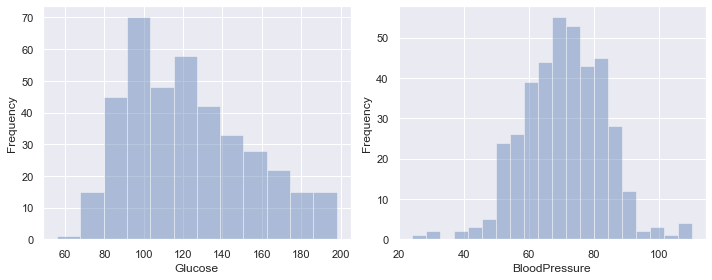

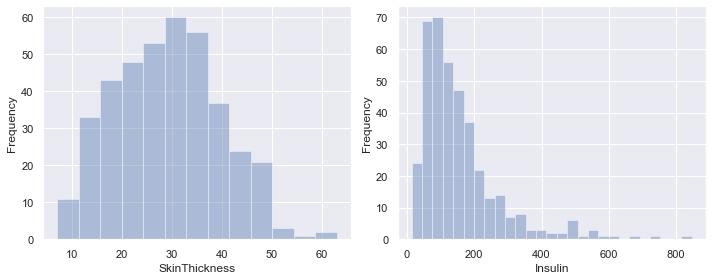

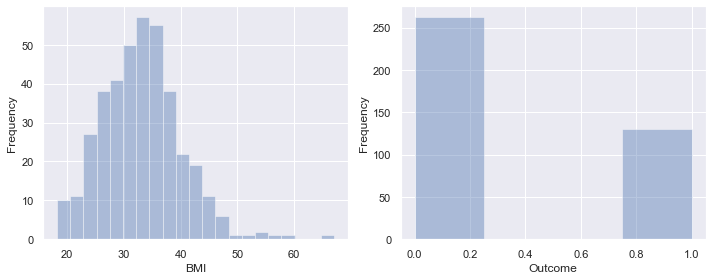

In [123]:
columns_new = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome']
for i in range(0,len(columns),2):
 plt.figure(figsize=(10,4))
 plt.subplot(121)
 sns.distplot(df_new[columns_new[i]], kde=False)
 plt.ylabel('Frequency')
 plt.subplot(122)
 sns.distplot(df_new[columns_new[i+1]], kde=False)
 plt.ylabel('Frequency')
 plt.tight_layout()
 plt.show()

Data Type of variable Pregnancies: int64
Count of variable Pregnancies: 392


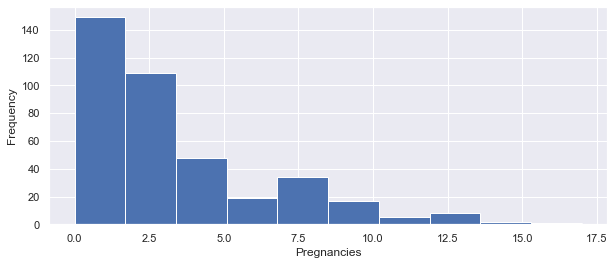

In [124]:
plt.figure(figsize = (10,4))
df_new['Pregnancies'].plot.hist()
plt.xlabel('Pregnancies')
print("Data Type of variable Pregnancies:",df_new['Pregnancies'].dtype)
print("Count of variable Pregnancies:",df_new['Pregnancies'].count())

Data Type of variable Glucose: float64
Count of variable Glucose: 392


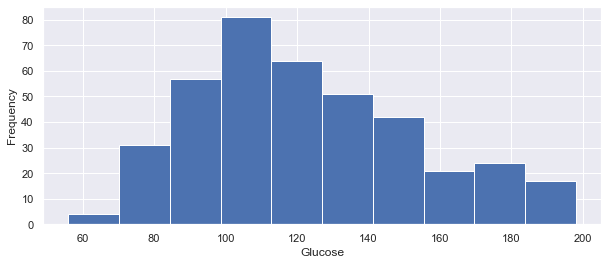

In [125]:
plt.figure(figsize = (10,4))
df_new['Glucose'].plot.hist()
plt.xlabel('Glucose')
print("Data Type of variable Glucose:",df_new['Glucose'].dtype)
print("Count of variable Glucose:",df_new['Glucose'].count())

Data Type of variable BloodPressure: float64
Count of variable BloodPressure: 392


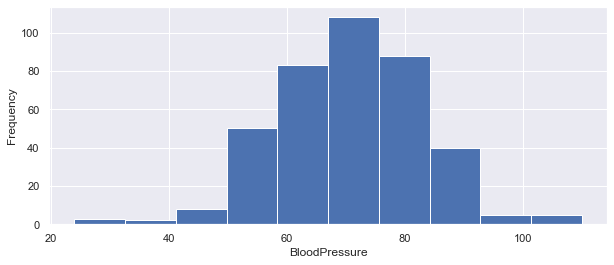

In [126]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome'
plt.figure(figsize = (10,4))
df_new['BloodPressure'].plot.hist()
plt.xlabel('BloodPressure')
print("Data Type of variable BloodPressure:",df_new['BloodPressure'].dtype)
print("Count of variable BloodPressure:",df_new['BloodPressure'].count())

Data Type of Variable SkinThickness: float64
Count of variable SkinThickness: 392


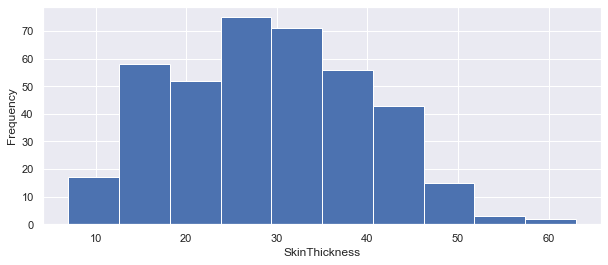

In [127]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome'
plt.figure(figsize = (10,4))
df_new['SkinThickness'].plot.hist()
plt.xlabel('SkinThickness')
print("Data Type of Variable SkinThickness:",df_new['SkinThickness'].dtype)
print("Count of variable SkinThickness:",df_new['SkinThickness'].count())

Data Type of Variable Insulin: float64
Count of variable Insulin: 392


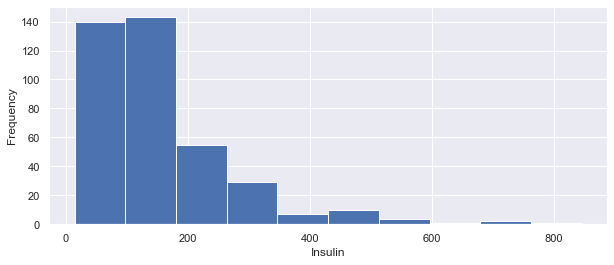

In [128]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome'
plt.figure(figsize = (10,4))
df_new['Insulin'].plot.hist()
plt.xlabel('Insulin')
print("Data Type of Variable Insulin:",df_new['Insulin'].dtype)
print("Count of variable Insulin:",df_new['Insulin'].count())

Data Type of Variable BMI: float64
Count of variable BMI: 392


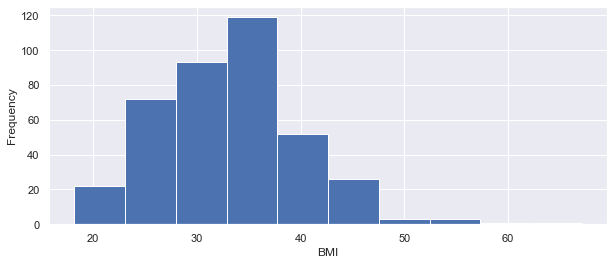

In [129]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome'
plt.figure(figsize = (10,4))
df_new['BMI'].plot.hist()
plt.xlabel('BMI')
print("Data Type of Variable BMI:",df_new['BMI'].dtype)
print("Count of variable BMI:",df_new['BMI'].count())

Data Type of Variable DiabetesPedigreeFunction: float64
Count of variable DiabetesPedigreeFunction: 392


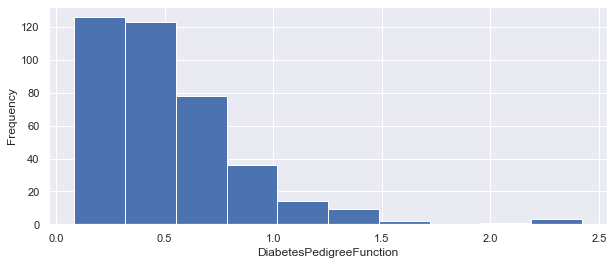

In [130]:
plt.figure(figsize = (10,4))
df_new['DiabetesPedigreeFunction'].plot.hist()
plt.xlabel('DiabetesPedigreeFunction')
print("Data Type of Variable DiabetesPedigreeFunction:",df_new['DiabetesPedigreeFunction'].dtype)
print("Count of variable DiabetesPedigreeFunction:",df_new['DiabetesPedigreeFunction'].count())

Data Type of Variable Age: int64
Count of variable Age: 392


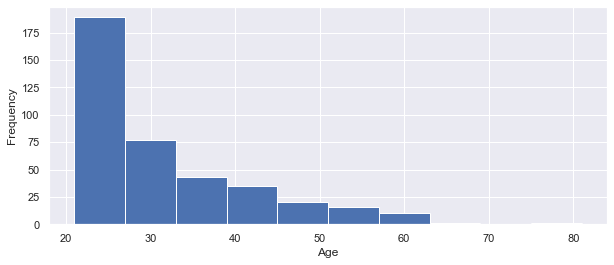

In [131]:
plt.figure(figsize = (10,4))
df_new['Age'].plot.hist()
plt.xlabel('Age')
print("Data Type of Variable Age:",df_new['Age'].dtype)
print("Count of variable Age:",df_new['Age'].count())

Data Type of Variable Outcome: int64
Count of variable Outcome: 392


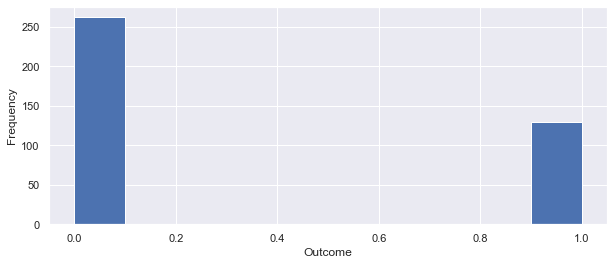

In [132]:
#'Glucose','BloodPressure','SkinThickness','Insulin','BMI','Outcome'
plt.figure(figsize = (10,4))
df_new['Outcome'].plot.hist()
plt.xlabel('Outcome')
print("Data Type of Variable Outcome:",df_new['Outcome'].dtype)
print("Count of variable Outcome:",df_new['Outcome'].count())

0    500
1    268
Name: Outcome, dtype: int64


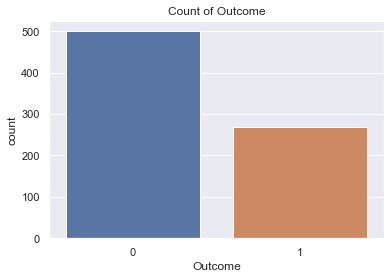

In [133]:
plt.figure(figsize = (6,4))
plt.title("Count of Outcome")
sns.set(style = "darkgrid")
sns.countplot(x= 'Outcome', data=df)
print(df['Outcome'].value_counts())

Text(0.5, 1, 'Scatter charts between the pair of variables')

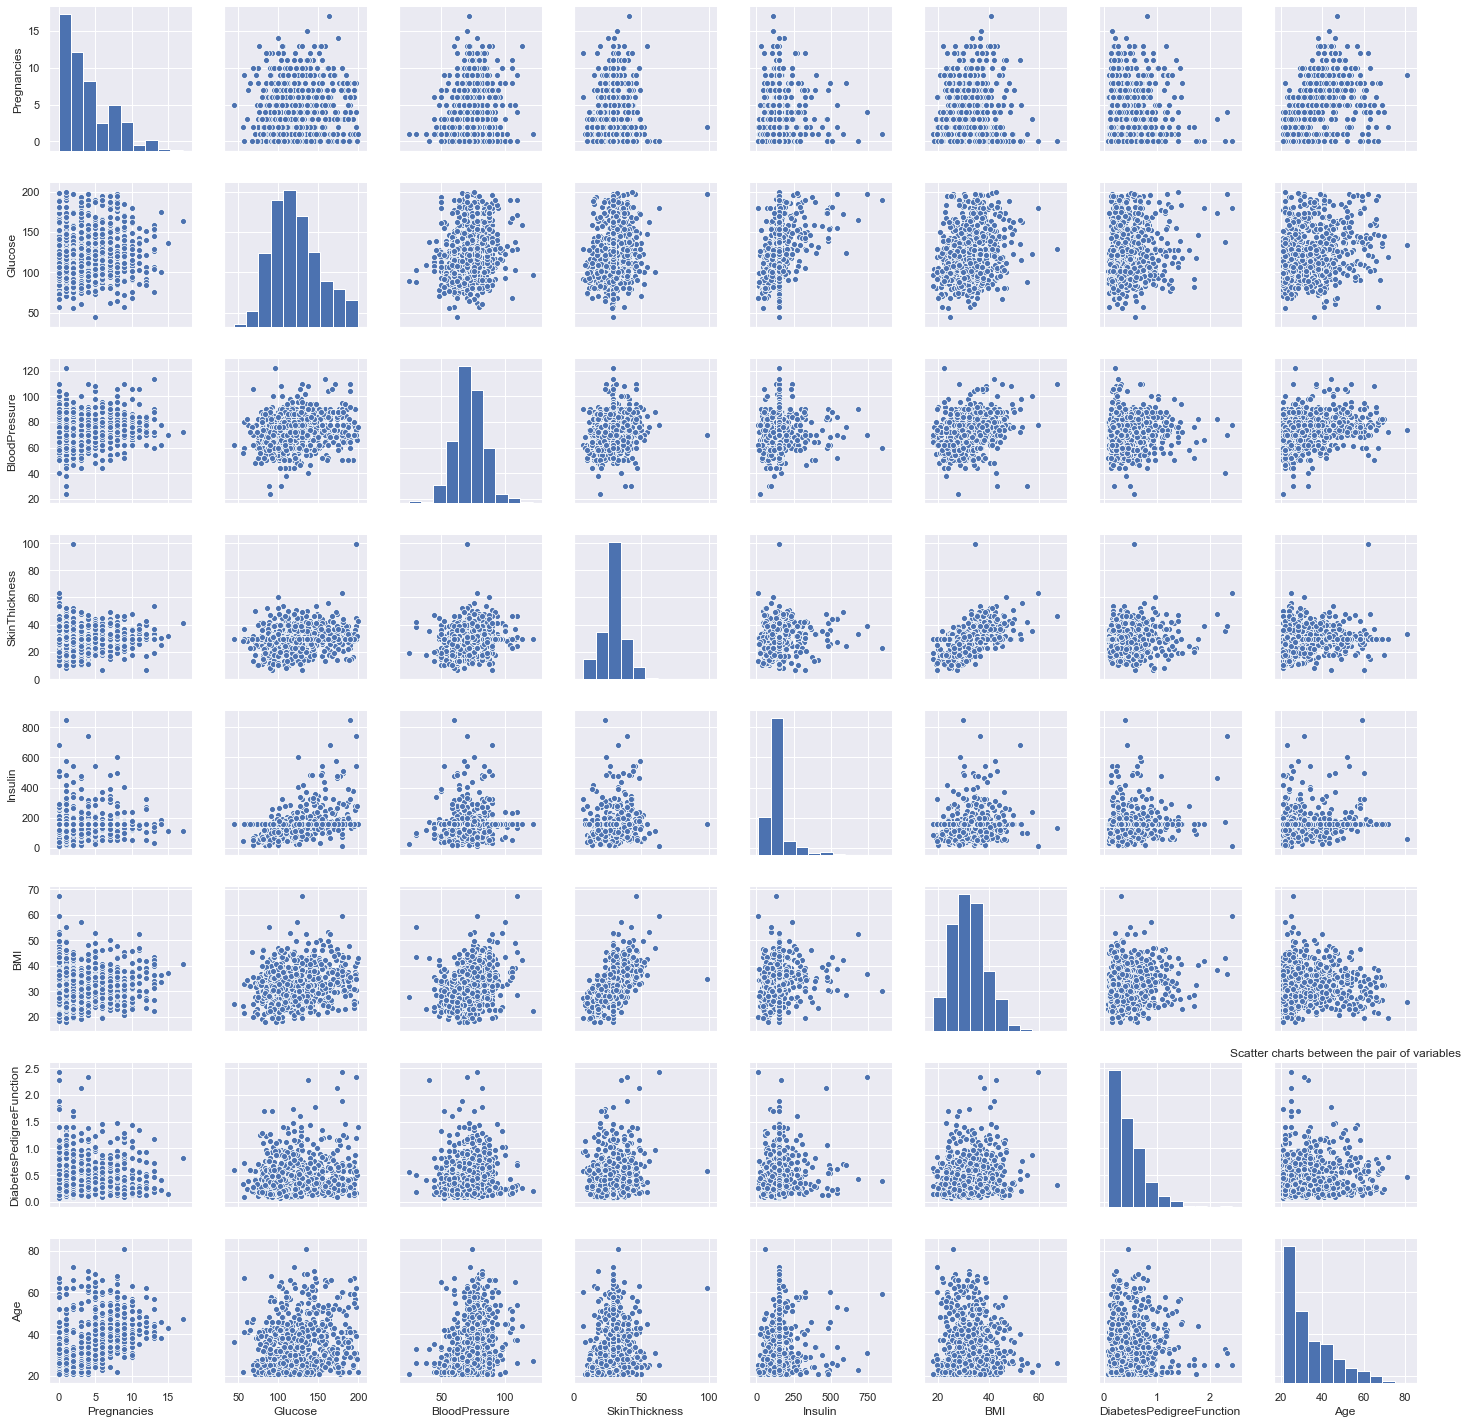

In [134]:
cols =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness' , 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
sns.pairplot(df[cols])
plt.title("Scatter charts between the pair of variables")

In [135]:
df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


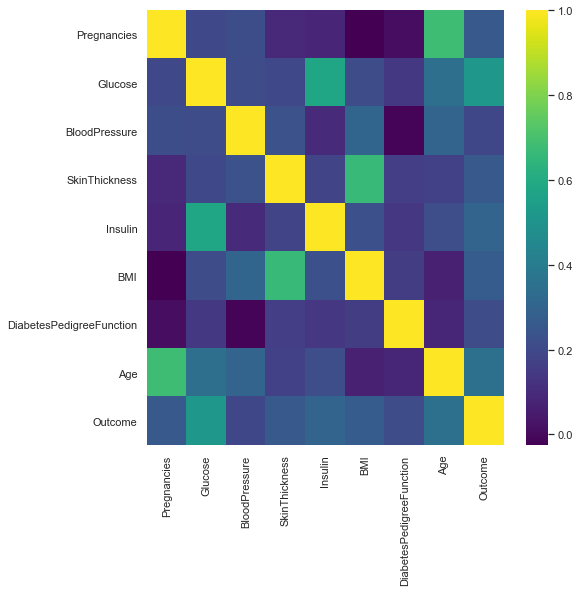

In [136]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(), cmap='viridis')

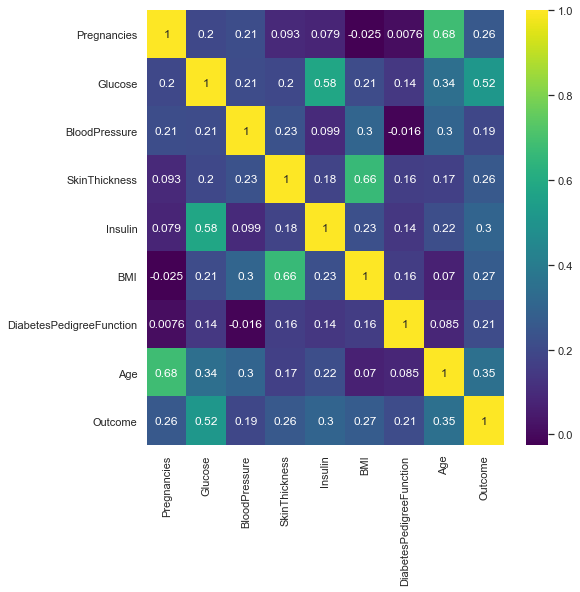

In [137]:
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(), annot=True , cmap='viridis')

In [152]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [154]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
Scale=StandardScaler()
x_train_std=Scale.fit_transform(x_train)
x_test_std=Scale.transform(x_test)

In [157]:
norm=lambda a:(a-min(a))/(max(a)-min(a))

In [158]:
df_norm=df.iloc[:,:-1]

In [159]:
df_normalized=df_norm.apply(norm)

In [160]:
x_train_norm,x_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [161]:
print(x_train_norm.shape)
print(x_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [162]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model.fit(x_train_std,y_train)
knn_pred=knn_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of KNN Model::
0.7922077922077922

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154
 


 ROC Curve


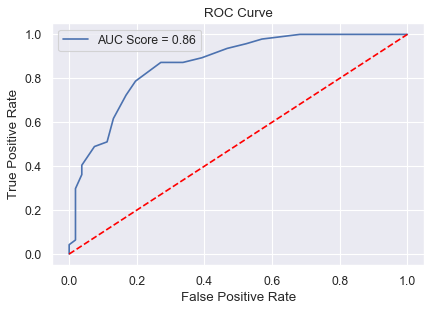

In [163]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [164]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(x_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(x_test_norm)

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154
 


 ROC Curve


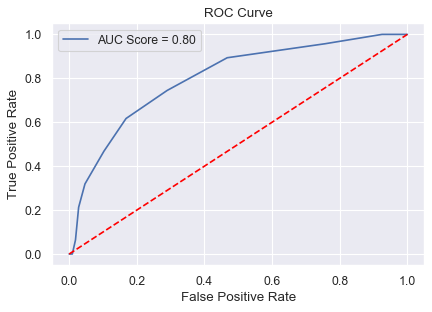

In [165]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model.predict_proba(x_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [166]:
from sklearn.svm import SVC
svc_model_linear = SVC(kernel='linear',random_state=0,probability=True,C=0.01) 
svc_model_linear.fit(x_train_std,y_train)
svc_pred=svc_model_linear.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with Linear Kernel::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.76      0.55      0.64        47

    accuracy                           0.81       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.81      0.81      0.80       154
 


 ROC Curve


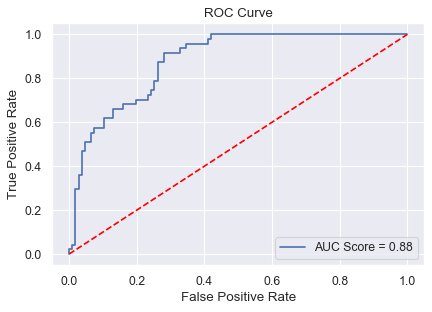

In [167]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with Linear Kernel::")
print(metrics.accuracy_score(y_test,svc_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred),'\n')
print("\n","ROC Curve")
svc_prob_linear=svc_model_linear.predict_proba(x_test_std)
svc_prob_linear1=svc_prob_linear[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_linear1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [168]:
from sklearn.svm import SVC
svc_model_rbf = SVC(kernel='rbf',random_state=0,probability=True,C=1) 
svc_model_rbf.fit(x_train_std,y_train)
svc_pred_rbf=svc_model_rbf.predict(x_test_std)

Model Validation ==>

Accuracy Score of SVC Model with RBF Kernel::
0.7727272727272727

 Classification Report::
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154
 


 ROC Curve


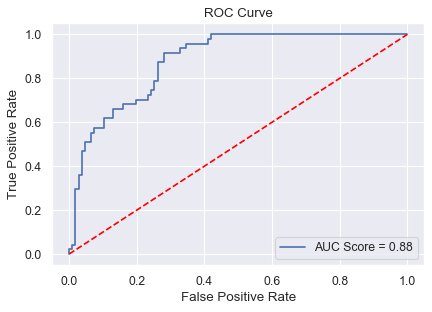

In [169]:
print("Model Validation ==>\n")
print("Accuracy Score of SVC Model with RBF Kernel::")
print(metrics.accuracy_score(y_test,svc_pred_rbf))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,svc_pred_rbf),'\n')
print("\n","ROC Curve")
svc_prob_rbf=svc_model_linear.predict_proba(x_test_std)
svc_prob_rbf1=svc_prob_rbf[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,svc_prob_rbf1)
roc_auc_svc=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_svc)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [170]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01) 
lr_model.fit(x_train_std,y_train)
lr_pred=lr_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.7792207792207793

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154
 


 ROC Curve


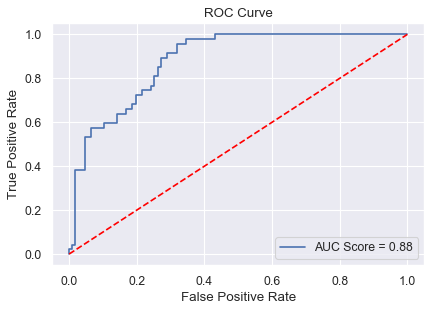

In [171]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","ROC Curve")
lr_prob=lr_model.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model.fit(x_train_std,y_train)
rf_pred=rf_model.predict(x_test_std)

Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154
 


 ROC Curve


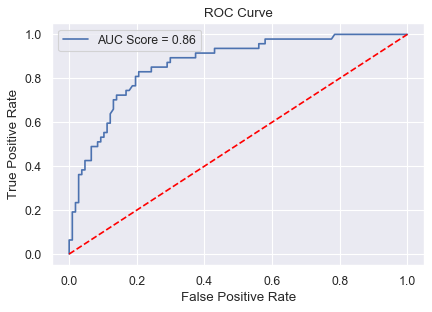

In [173]:
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,rf_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred),'\n')
print("\n","ROC Curve")
rf_prob=rf_model.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()